In [1]:
#load libraries 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#load the database to a dataframe
df = pd.read_csv('../data/lanternworlddata.tsv', sep='\t')

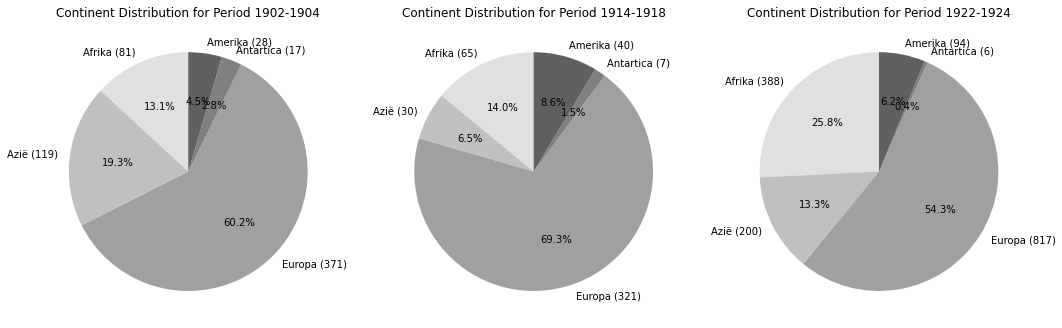

In [3]:
#this cell creates pie charts of the continents per period

# Create a dictionary to keep track of the counts
continent_counts = {
    period: {continent: 0 for continent in ['Afrika', 'Azië', 'Europa', 'Antartica', 'Amerika', 'Oceanië']} 
    for period in df['period'].unique()
}

# Iterate over each row to update the counts
for _, row in df.iterrows():
    period = row['period']
    continents_in_row = row['continent'].split(',')
    for continent in continents_in_row:
        if continent in continent_counts[period]:
            continent_counts[period][continent] += 1

# Shades of gray for the pie chart
colors = ['#E0E0E0', '#C0C0C0', '#A0A0A0', '#808080', '#606060', '#404040']

# Create a 1x3 grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Define the periods we want to visualize
selected_periods = ['1902-1904', '1914-1918', '1922-1924']


# Plot a pie chart for each selected period
for index, period in enumerate(selected_periods):
    ax = axes[index]
    counts = continent_counts[period]
    filtered_counts = {k: v for k, v in counts.items() if v > 0}
    labels = [f"{continent} ({count})" for continent, count in filtered_counts.items()]
    ax.pie(list(filtered_counts.values()), labels=labels, autopct='%1.1f%%', startangle=90, colors=colors[:len(filtered_counts)])
    ax.set_title(f'Continent Distribution for Period {period}')

# Save the figure with 300 dpi
fig.tight_layout()

#The code below saves the Figure X of the article
fig.savefig('combined_pie_charts.png', dpi=300)